# Rotating Optical Constants

Using the optical tensor derived from the linear dichrosim measured with experimental nexafs,
this notebook works though the process of converting from the molecular reference frame to the
material reference frame. The molecular reference frame is defined by the orientation of 
the transition dipole moment associate with the primary $\pi^*$ resonant feature. This TDM orientation
defines the out of plane, extrodinary, or $zz$ optical axis. The ordinary, or in-plane optical axes
are defined to be perpandicular to this $zz$ axis. 

The material optical model can be derived by the ensemble average of properly rotated molecules. 
We approximate this process by rotating the optical model by the average molecular tilt angle,
i.e., 
$$
    \tilde{n}(\vec\theta) = R(\theta)\tilde{n}'R(\vec\theta)^T
$$
where $R(\theta)$ is the rotation matrix describing the proper molecular rotation. Most molecules 
are approximated as uniaxial materials, azamuthal symmetry. In this case, the only angle that maters
is the polar angle $\theta$. 

,μ₂₀,μ₄₀,μ₅₅,μ₇₀,μ₉₀,Energy [eV]
1,4793.8398,4787.5586,4773.2593,4766.6880,4761.0200,279.999586
2,4794.9214,4788.6357,4773.5957,4766.7251,4760.8813,280.100006
3,4796.2891,4789.6636,4774.0200,4766.9688,4760.8457,280.199906
4,4797.5137,4790.8784,4774.6538,4767.3296,4761.0391,280.299378
5,4799.3608,4792.2939,4775.4473,4767.8291,4761.2002,280.399842


<Axes: xlabel='Energy [eV]'>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

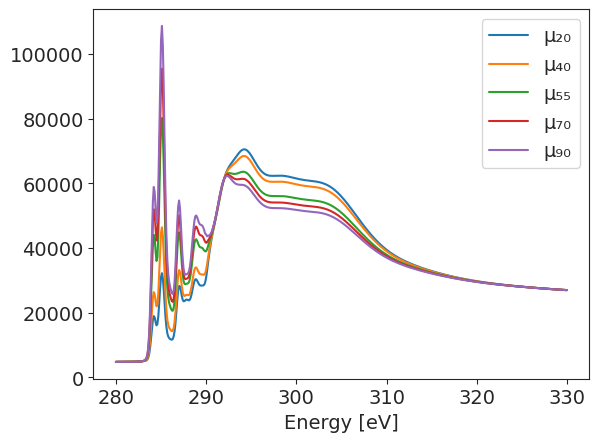

In [52]:
import pandas as pd
import numpy as np


raw = pd.read_csv("C32H16N8Zn.raw")
# drop the first row
raw = raw.drop(0)
energy_cols = [col for col in raw.columns if "Energy" in col]
# make a new column e [eV] that is the average of the energy columns
raw["Energy [eV]"] = raw[energy_cols].mean(axis=1)
raw = raw.drop(energy_cols, axis=1).sort_values("Energy [eV]")
# update column names to be more descriptive
raw.columns = ["μ₂₀", "μ₄₀", "μ₅₅", "μ₇₀", "μ₉₀", "Energy [eV]"]
display(raw.head())
raw.plot(x="Energy [eV]")

In [58]:
from kkcalc import kk

for mu in raw.columns[:-1]:
    # nexafs data is the pairing of energy and absorption

4773.2593
4773.5957
4774.02
4774.6538
4775.4473
4776.062
4777.2988
4778.7471
4780.1523
4781.7153
4783.5391
4785.4834
4787.709
4790.0288
4792.6943
4795.4561
4798.4307
4801.7197
4805.3145
4809.1362
4813.373
4818.291
4823.981
4830.7314
4839.3491
4850.2949
4865.5542
4886.0615
4915.1318
4956.7114
5017.2056
5097.6826
5223.6226
5432.4014
5819.4219
6636.168
8413.5127
11713.929
17316.545
25137.826
33783.559
40864.07
44048.918
42805.816
38929.395
35951.883
37049.938
43680.148
54760.008
67372.555
77073.047
80145.961
75780.008
65601.164
53002.98
41635.555
33093.453
27781.514
24698.342
23048.545
22036.488
21257.361
20681.414
20568.691
21411.402
23750.688
27904.178
33368.441
39067.367
43286.523
44817.688
43302.379
39616.863
35382.504
31858.932
29754.326
28910.076
28796.564
28902.068
28977.174
29080.723
29428.713
30427.334
32082.209
34309.238
37001.852
39458.039
41432.25
42500.742
42681.141
42194.457
41421.195
40717.133
40292.043
40142.508
40110.648
39928.789
39506.613
39160.762
38953.305
38971.676
3

In [59]:
def R(theta: float) -> np.ndarray:
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]])


# [e, n]
n_para = np.loadtxt("para.csv", delimiter="\t")
n_perp = np.loadtxt("perp.csv", delimiter="\t")

e = n_para[:, 0]
n = np.zeros((n_para.shape[0], 2, 2))
n[:, 0, 0] = n_para[:, 1]
n[:, 1, 1] = n_perp[:, 1]

[[ 0.00966085 -0.00317288]
 [-0.00317288  0.00543515]]


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

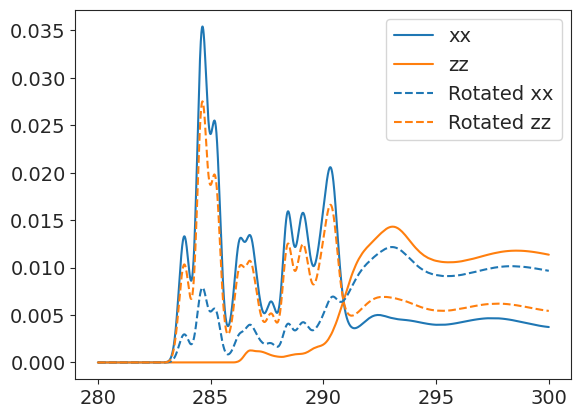

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("ticks")
font = {
    "family": "sans-serif",
    "sans-serif": "Arial",
    "weight": "regular",
    "size": 14,
}
plt.rc("font", **font)

theta = np.deg2rad(61.83)
r = R(theta)
n_r = r @ n @ r.T
print(n_r[0])

plt.plot(e, n[:, 0, 0], label="xx", color="C0")
plt.plot(e, n[:, 1, 1], label="zz", color="C1")
plt.plot(e, n_r[:, 0, 0], label="Rotated xx", color="C0", linestyle="--")
plt.plot(e, n_r[:, 1, 1], label="Rotated zz", color="C1", linestyle="--")
plt.legend()